In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

In [2]:
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


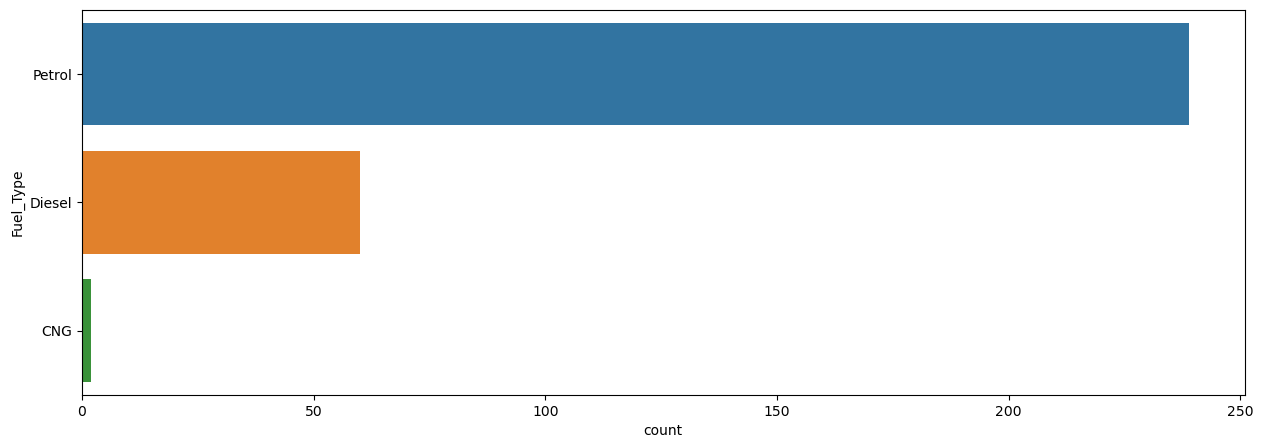

In [3]:
plt.figure(figsize=(15,5))
sns.countplot(y='Fuel_Type',data=data)
plt.show()

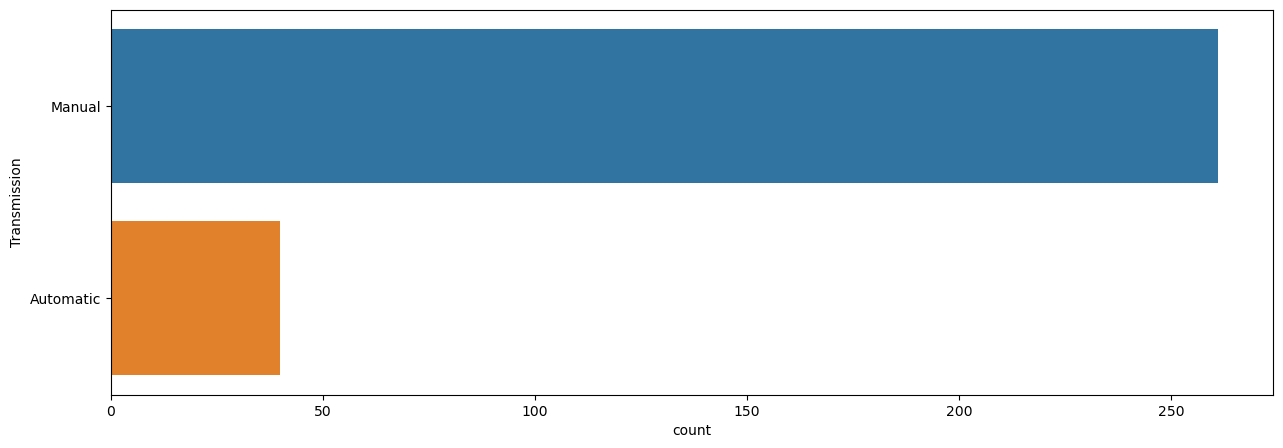

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(y='Transmission',data=data)
plt.show()

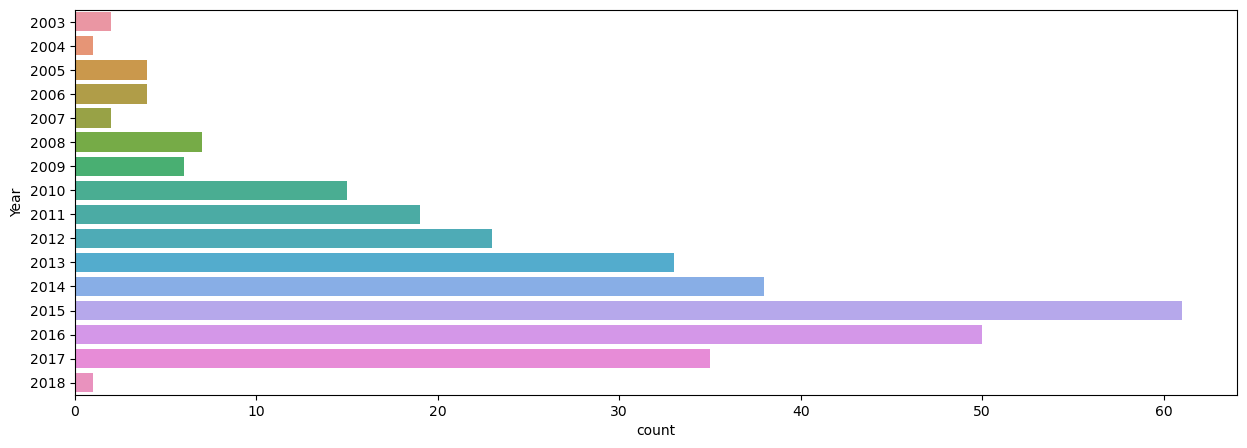

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Year',data=data)
plt.show()

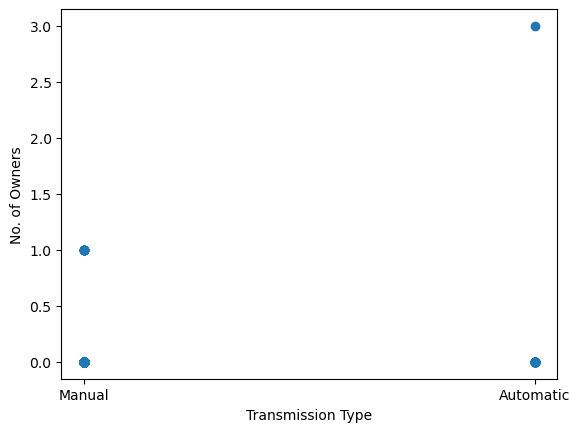

In [14]:
plt.xlabel('Transmission Type')
plt.ylabel('No. of Owners')
plt.scatter(data['Transmission'],data['Owner'])

In [19]:
from sklearn.preprocessing import LabelEncoder


cols = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']
#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,59,57,86,2,0,1,0
1,93,10,78,104,135,1,0,1,0
2,68,14,112,106,26,2,0,1,0
3,96,8,52,49,18,2,0,1,0
4,92,11,76,73,134,1,0,1,0


In [21]:
data_price = data.drop('Car_Name',axis=1)
data_price.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,59,57,86,2,0,1,0
1,10,78,104,135,1,0,1,0
2,14,112,106,26,2,0,1,0
3,8,52,49,18,2,0,1,0
4,11,76,73,134,1,0,1,0


In [22]:
features = list(data_price.columns)
d = data_price[features] 
features

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [23]:
#Clustering According to the price of the vehicle owned

from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
d['clusters'] = clustering_kmeans.fit_predict(d)     
d

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,clusters
0,11,59,57,86,2,0,1,0,1
1,10,78,104,135,1,0,1,0,0
2,14,112,106,26,2,0,1,0,0
3,8,52,49,18,2,0,1,0,1
4,11,76,73,134,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
296,13,129,115,103,1,0,1,0,0
297,12,70,62,172,2,0,1,0,0
298,6,59,114,193,2,0,1,0,0
299,14,137,120,31,1,0,1,0,0


Text(0, 0.5, 'Selling_Price')

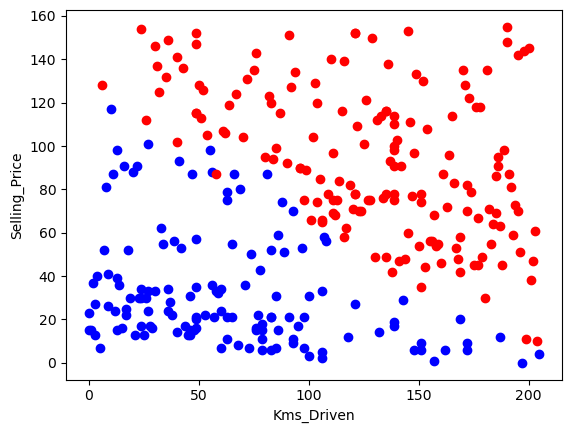

In [24]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Kms_Driven, d1['Selling_Price'],color='blue')
plt.scatter(d0.Kms_Driven, d0['Selling_Price'],color='red')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')

Text(0, 0.5, 'Transmission')

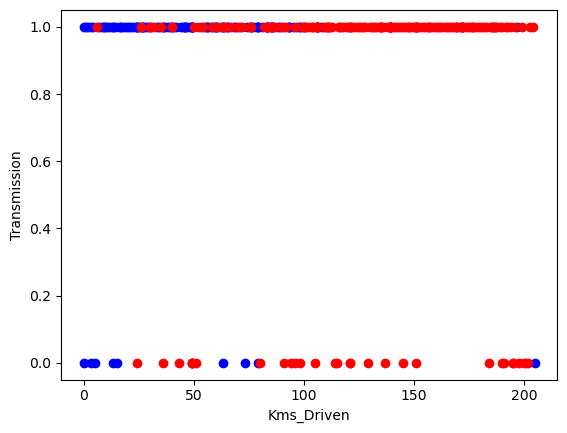

In [26]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Kms_Driven, d1['Transmission'],color='blue')
plt.scatter(d0.Kms_Driven, d0['Transmission'],color='red')
plt.xlabel('Kms_Driven')
plt.ylabel('Transmission')

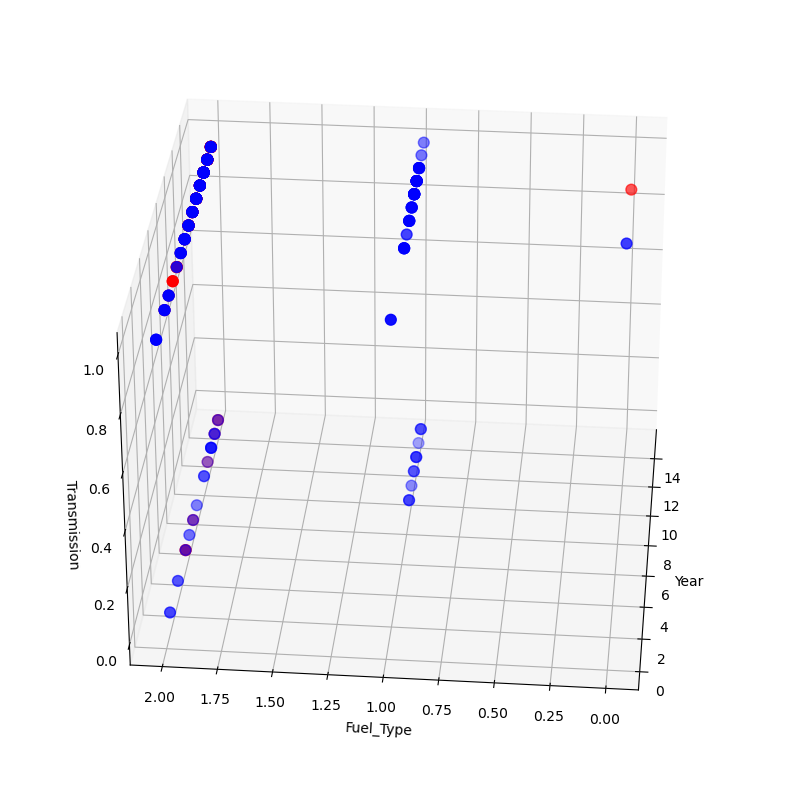

In [28]:
#3 dimentional visualization - Year,Fuel_Type,Transmission

labels = clustering_kmeans.labels_
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Year[labels == 0], d["Fuel_Type"][labels == 0], d["Transmission"][labels == 0],  c='blue', s=60)
ax.scatter(d.Year[labels == 1], d["Fuel_Type"][labels == 1], d["Transmission"][labels == 1],  c='red', s=60)
ax.scatter(d.Year[labels == 2], d["Fuel_Type"][labels == 2], d["Transmission"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Year")
plt.ylabel("Fuel_Type")
ax.set_zlabel('Transmission')
plt.show()